# 正準相関分析 （Wine Quality）

[Wine Data](https://archive.ics.uci.edu/dataset/109/wine)

In [47]:
!pip install ucimlrepo

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

print(X.shape)
print(y.shape)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [50]:

print(np.max(y), np.min(y))
# One hot encoding
n_labels = len(np.unique(y))
print(n_labels)
Y = np.eye(n_labels)[y-3].reshape((len(y), n_labels))

print(Y)

9 3
7
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [51]:
df_color = pd.get_dummies(wine_quality.data.original['color'], dtype=int)

print(df_color.values)


[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [52]:
Y = np.concatenate((Y, df_color.values), axis=1)

print(Y)

[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


CCA

In [53]:
# Canonical Correlation Analysis (CCA)

cca = CCA(n_components=2)
cca.fit(X, Y)
X_r, Y_r = cca.transform(X, Y)

print('the coefficient of determination R^2 =', cca.score(X, Y))

the coefficient of determination R^2 = 0.1930389099688713


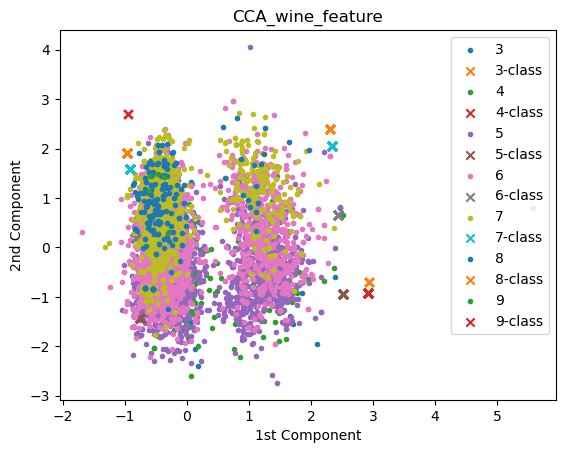

In [54]:

## plot
plt.figure()
for i  in range(n_labels):
    plt.scatter(X_r[y.values.reshape(len(y)) == i + 3, 0], X_r[y.values.reshape(len(y)) == i + 3, 1], marker='.', label=str(i+3))
    plt.scatter(Y_r[y.values.reshape(len(y)) == i + 3, 0], Y_r[y.values.reshape(len(y)) == i + 3, 1], marker='x', label=str(i+3)+'-class')
#plt.scatter(X_r[:, 0], X_r[:, 1], marker='.')
#plt.scatter(Y_r[:, 0], Y_r[:, 1], marker='x')
    
plt.legend()
plt.title('CCA_wine_feature')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.savefig('CCA_wine_feature.png')
plt.show()